## Practica - Primer Parcial

#### Importacion de las librerias requeridas

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from feature_engine.imputation import RandomSampleImputer
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

#### Carga de los datos a un dataframe

Nuestro archivo dist.data es un archivo separado por comas por lo cual se indica el separador y se usa la funcion read_csv

Adicional se presentan las primeras 5 filas y el tipo dato


In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/isaacGGomez/Ing_Caract/master/dist.data",sep = ",")
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,1.319733,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,7.129585,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,NaN,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,NaN,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,3.369261,25.493163


Con la funcion *info()* podemos ver un aproximado de cuantos datos faltantes existen por columna de los 528 que contiene, adicional el tipo de dato que tenemos donde x5 y x6 son variables categoricas

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     484 non-null    float64
 1   x_2     265 non-null    float64
 2   x_3     464 non-null    float64
 3   x_4     507 non-null    float64
 4   x_5     377 non-null    object 
 5   x_6     358 non-null    object 
 6   x_7     155 non-null    float64
 7   y       518 non-null    float64
dtypes: float64(6), object(2)
memory usage: 33.1+ KB


#### Porcentaje de valores faltantes por columna

A continuacion se presenta el porcentaje de datos faltantes por columna por lo cual sera necesario eliminar la variable **x_7** debido a que presenta mas del 60% de datos faltantes

In [21]:
dataNA = data.isna()
dataNA.head()
GroupNA = dataNA.sum()
sizedf = len(dataNA)
(GroupNA/sizedf)*100

x_1     8.333333
x_2    49.810606
x_3    12.121212
x_4     3.977273
x_5    28.598485
x_6    32.196970
x_7    70.643939
y       1.893939
dtype: float64

En la variable **finaldf** se guarda un dataframe sin la variable x7

In [22]:
finaldf = data.drop(axis=1,columns='x_7')
finaldf.head()

,x_1,x_2,x_3,x_4,x_5,x_6,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,25.493163


#### Exploracion de los datos

Mediante histogramas se pueden observar a grandes rasgos las diversas distribuciones que contienen nuestras variables,

Conforme a lo observado las variables **x_1** y **x_3** presentan una distribucion similar a la uniforme lo cual debera ser validado con la curtosis

Las variables **x_2** y **Y** presentan variables similares a la normal

Finalmente la variable **x_4** presenta sesgo negativo

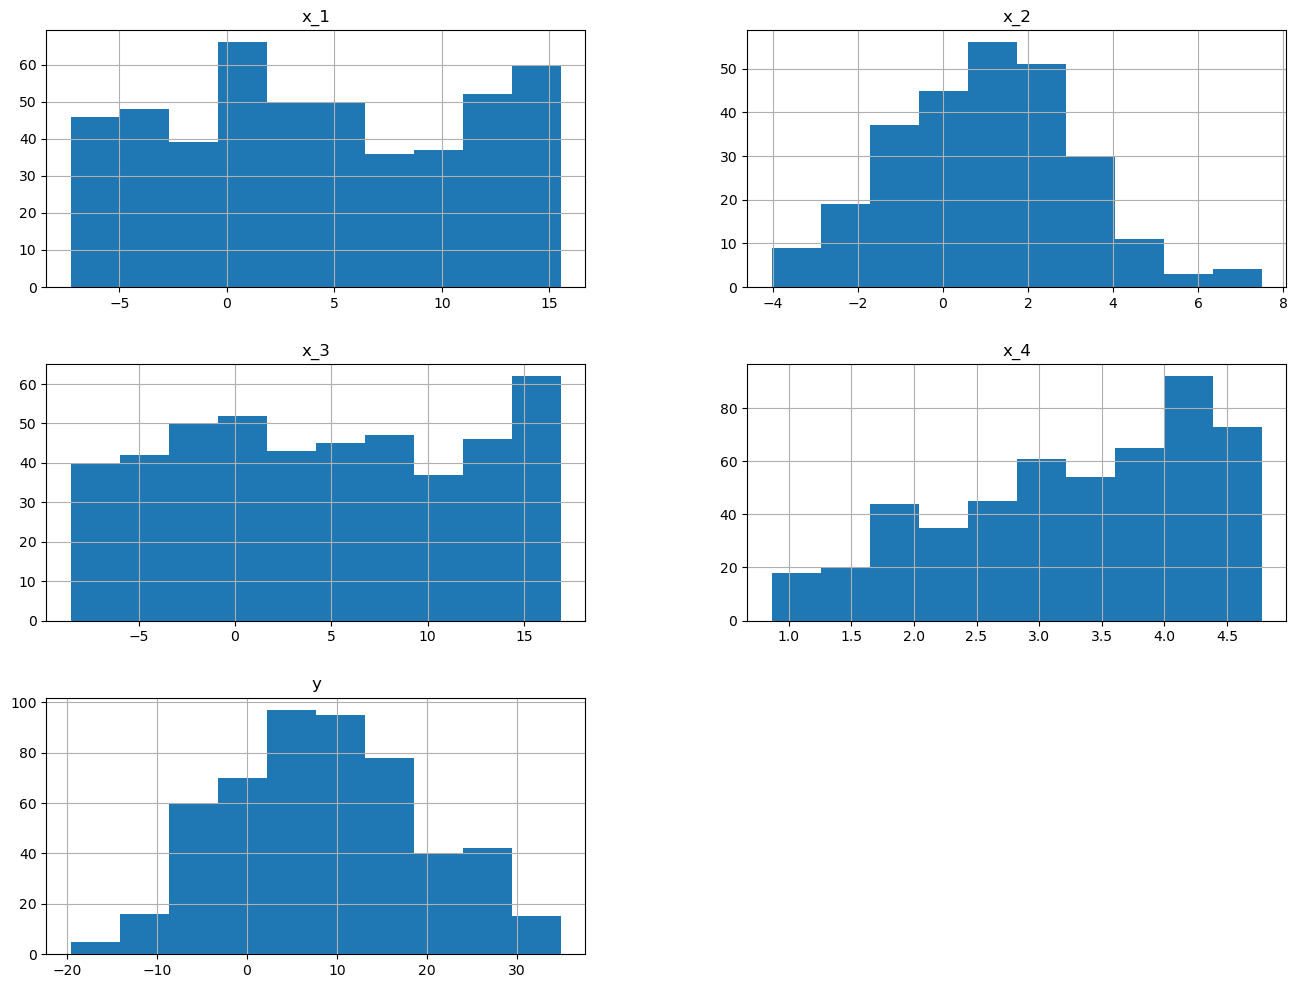

In [23]:
plots = finaldf.hist(figsize=(16,12))

Con base a lo comentado previamente y los valores de la curtosis las variables **x_1** y  **x_3** si presentan una distribucion uniforme

In [24]:
finaldf.drop(['x_5','x_6'],axis=1).kurt()

x_1   -1.216049
x_2   -0.081620
x_3   -1.217412
x_4   -0.823828
y     -0.508963
dtype: float64

La variable **x_4** si presenta sesgo negativo

In [25]:
finaldf.drop(['x_5','x_6'],axis=1).skew()

x_1    0.045977
x_2    0.196266
x_3    0.012478
x_4   -0.478714
y      0.130844
dtype: float64

Para nuestras variables categoricas **x_5** y **x_6** se realizan graficos de barras donde se puede observar los valores con mayor frecuencia siendo App y MB respectivamente

<AxesSubplot:>

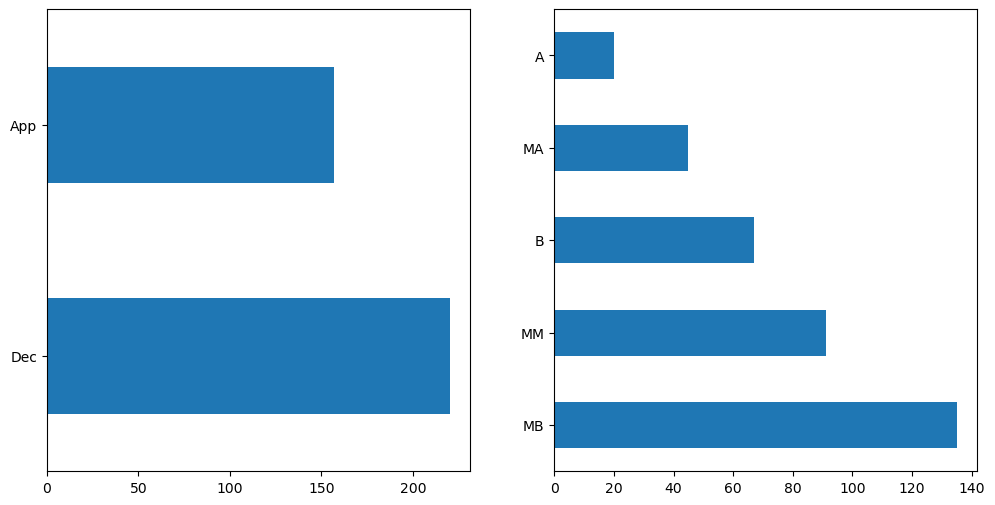

In [26]:
fig, axs = plt.subplots(1,2)

data['x_5'].value_counts().plot(kind='barh',ax=axs[0],figsize = (12,6))
data['x_6'].value_counts().plot(kind='barh',ax=axs[1],figsize = (12,6))

#### Tratamiento de los datos

Con base a lo anterior las sustituciones se realizaran del siguiente modo:

x_1: Imputacion mediante sustitucion aleatoria

x_2: Imputacion mediante la media aritmetica

x_3: Imputacion mediante sustitucion aleatoria

x_4: Imputacion mediante la mediana

x_5: Imputacion mediante la moda

x_6: Imputacion mediante la moda

y = Imputacion mediante la media aritmetica


In [27]:
finaldf['x_4'] = SimpleImputer(strategy='median').fit_transform(finaldf['x_4'].to_numpy().reshape(-1,1))
finaldf[['x_5','x_6']] = SimpleImputer(strategy='most_frequent').fit_transform(finaldf[['x_5','x_6']])
finaldf[['x_1','x_3']] = RandomSampleImputer().fit_transform(finaldf[['x_1','x_3']])
finaldf[['x_2','y']] = SimpleImputer().fit_transform(finaldf[['x_2','y']])

In [28]:
finaldf.isna().sum()

x_1    0
x_2    0
x_3    0
x_4    0
x_5    0
x_6    0
y      0
dtype: int64

#### Regresion Lineal

Realice una regresion lineal de la forma $$ y = a_1x_1 + a_2x_3 + a^{2}_3 + b$$

Para las variables  'x_1', 'x_3' y el cuadrado de 'x_4'

In [29]:
finaldf['x4^2'] = finaldf['x_4']**2
lin = LinearRegression()
lin.fit(finaldf[['x_1','x_3','x4^2']],finaldf['y'])
lin.score(finaldf[['x_1','x_3','x4^2']],finaldf['y'])

0.8110322264586904

In [30]:
(lin.coef_,lin.intercept_)

(array([ 0.71545429,  1.11926106, -0.35017935]), 4.65211403175847)

In [31]:
def fun(a,x,x1,x2,y):
    f=a[0]+a[1]*x+a[2]*x1+a[3]*x2**2
    return np.mean((f-y)**2)
a0 = np.random.rand(4)
sol = minimize(fun, a0, args=(finaldf.x_1, finaldf.x_3, finaldf.x_4, finaldf.y))
sol.x

array([ 4.65211415,  0.71545428,  1.11926105, -0.35017936])

In [32]:
sol.fun

22.477895662756147

La ecuación encontrada es:
$$ y = 4.51 + 0.68x_1 + 1.11x_3 - 0.36x^{2}_4 $$

Con $$mse =27.106$$

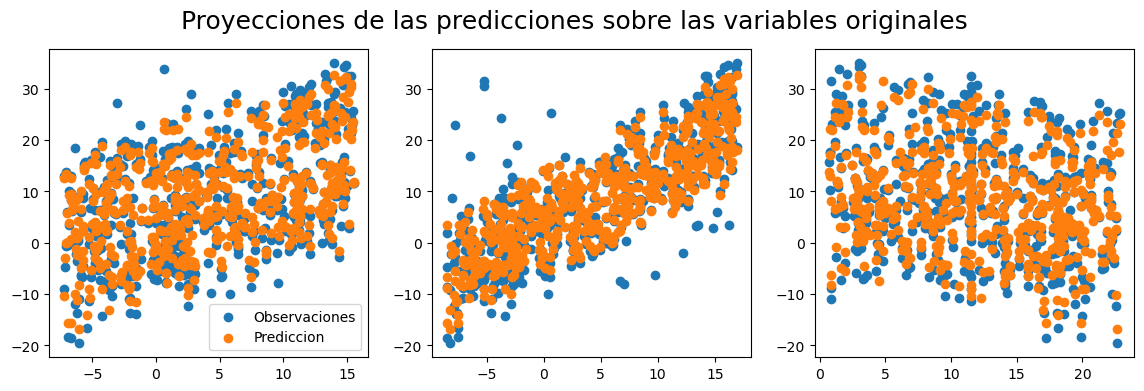

In [33]:
plt.rcParams["figure.figsize"] = (14,4)


fig, axs = plt.subplots(1,3)
axs[0].scatter(finaldf.x_1,finaldf.y,label = 'Observaciones')
axs[0].scatter(finaldf.x_1,lin.predict(finaldf[['x_1','x_3','x4^2']]),label = 'Prediccion')
axs[0].legend()

#axs[0].plt.grid()
axs[1].scatter(finaldf.x_3,finaldf.y,label = 'Observaciones')
axs[1].scatter(finaldf.x_3,lin.predict(finaldf[['x_1','x_3','x4^2']]),label = 'Prediccion')

axs[2].scatter(finaldf['x4^2'],finaldf.y,label = 'Observaciones')
axs[2].scatter(finaldf['x4^2'],lin.predict(finaldf[['x_1','x_3','x4^2']]),label = 'Prediccion')
fig.suptitle(' Proyecciones de las predicciones sobre las variables originales ', fontsize=18)
plt.show()

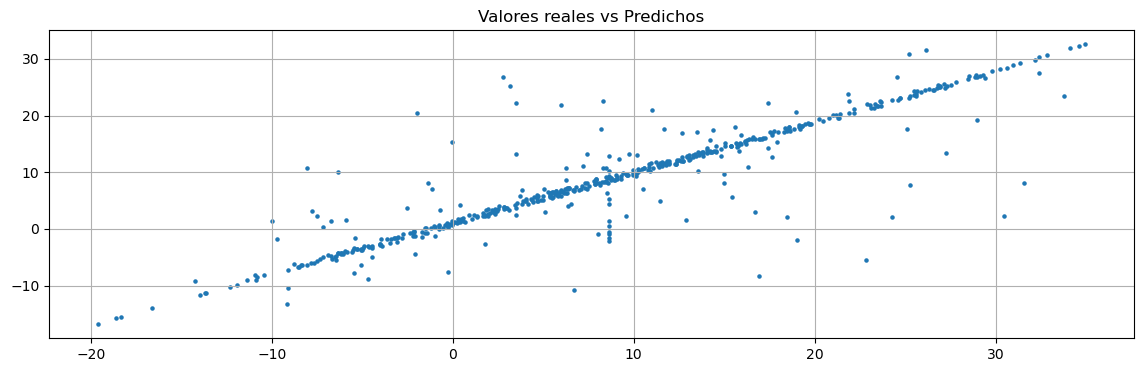

In [34]:
pred=lin.predict(finaldf[['x_1','x_3','x4^2']])
plt.scatter(finaldf.y,pred,s=5,label='Observaciones')
plt.title(label = 'Valores reales vs Predichos')
plt.grid()